In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# NYTimes US county level COVID-19 data 
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2Fnytimes%2Fcovid-19-data%2Fmaster%2Fus-counties.csv&filename=us-counties.csv"


In [3]:
df = pd.read_csv(url, usecols=lambda x: x.lower() not in ('fips'))

df

df.index

df[df['state'] == 'Texas']

In [4]:
tx = df[df['state'] == 'Texas']
txdfw = tx[tx['county'] == 'Dallas']

#df_tx_pivot = tx.pivot(index='date', columns='county', values='cases')
df_txdfw_pivot = txdfw.pivot(index='date', columns='county', values=['cases', 'deaths'])

df_txdfw_pivot

#df_tx_pivot.plot(figsize=[15, 10])
df_txdfw_pivot.plot(figsize=[15, 10])

#fig, axes = plt.subplots()


fig = plt.figure(figsize=[15, 10])
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(df_txdfw_pivot['cases'])
axes.set_ylabel('# Cases')
#axes.secondary_yaxis

#ax = df_txdfw_pivot.plot(figsize=[15, 10], secondary_y=['deaths'])
#type(ax)
#df_txdfw_pivot['deaths'].plot(secondary_y=True, figsize=[15, 10])

#ax.set_ylabel('# Cases')
#ax.right_ax.set_ylabel('# Deaths')


No handles with labels found to put in legend.


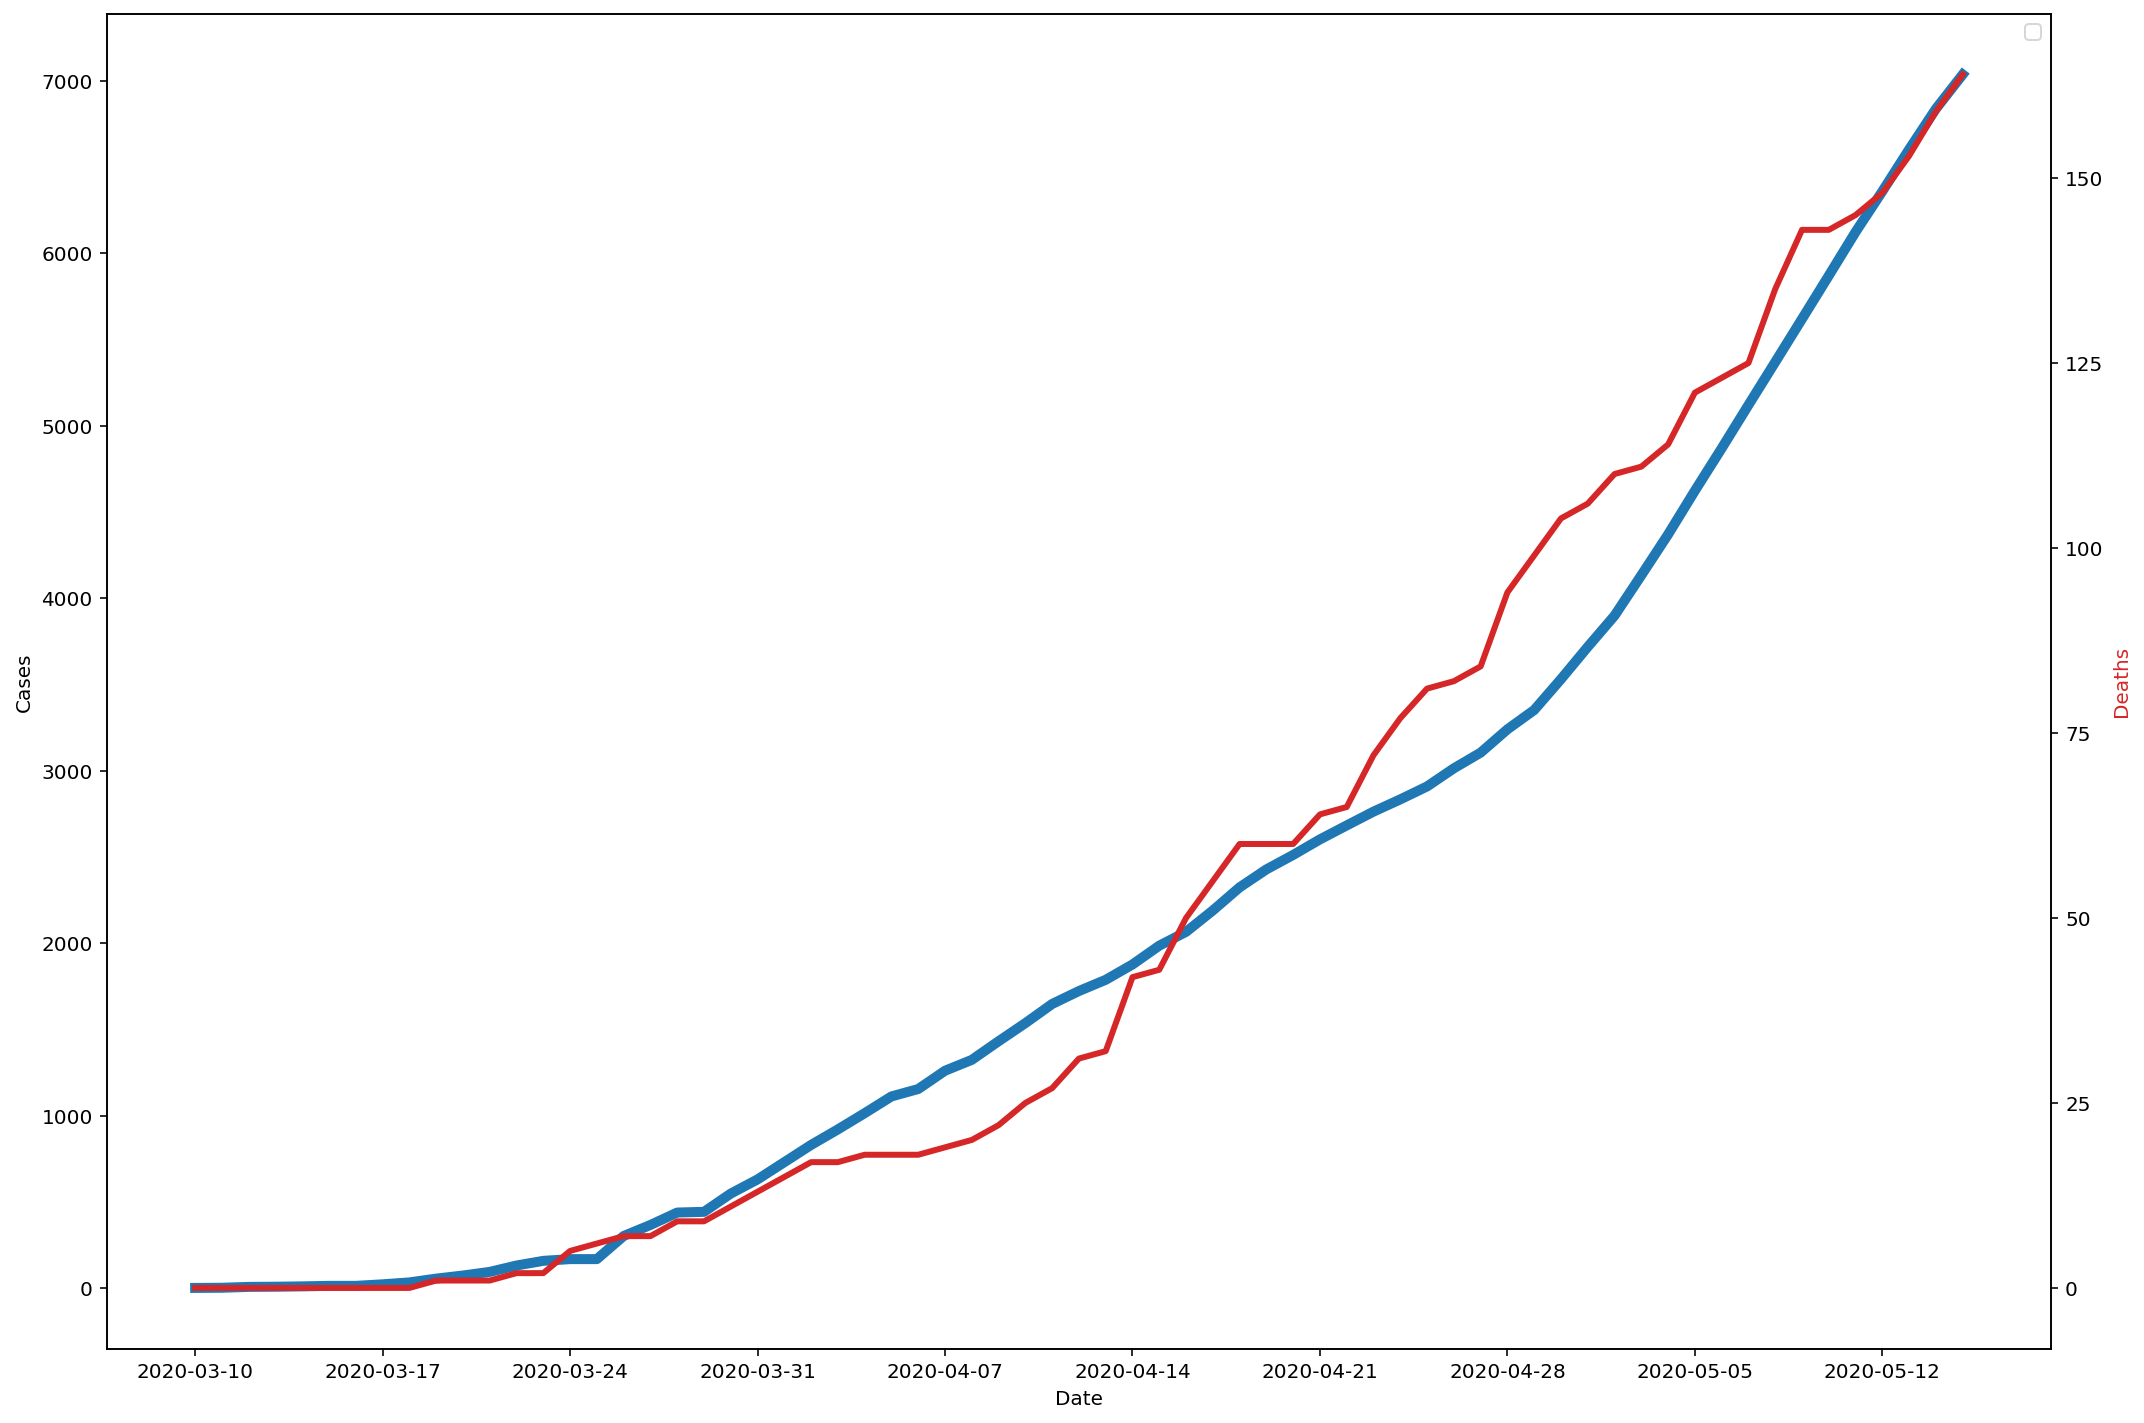

In [5]:
fig, ax1 = plt.subplots(figsize=[15,10])

ax1.set_xlabel('Date')
ax1.set_ylabel('Cases')
#xmin, xmax = ax1.get_xlim()
#stepsize = 7
#ax1.xaxis.set_ticks(np.arange(xmin, xmax, stepsize))
#loc = matplotlib.dates.AutoDateLocator()
#ax1.xaxis.set_major_locator(loc)
l1 = ax1.plot(df_txdfw_pivot['cases'], linewidth=5)
ax1.set_xticks(ax1.get_xticks()[::7])

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Deaths', color=color)
l2 = ax2.plot(df_txdfw_pivot['deaths'], color=color, linewidth=3)
ax2.set_xticks(ax2.get_xticks()[::7])

#ax1.legend((l1, l2), ('Cases', 'Deaths'), loc='upper left', shadow=True)
fig.tight_layout()
plt.legend()
plt.show()